For signal extraction, simultaneous fits are conducted on the mγ γ and mjj distributions.
Initially, separate parametric fits are executed for each category on these distributions.
Subsequently, the final signal and background models are constructed by taking the product
of the independent $m_{\gamma\gamma}$ and $m_{jj}$ models. This independence was verified for signal, background
simulations, and data by studying the possible correlations using the 2D distributions of
the $m_{\gamma\gamma}$ and $m_{jj}$ observables which were found to be negligible

For each signal, background, and data, we are considering to look for the correlation of 
1.  $m_{\gamma\gamma}$ and $m_{jj}$ 
2. $m_{bb\gamma\gamma}$ and $m_{jj}$ 
3. $m_{bb\gamma\gamma}$ and $m_{\gamma\gamma}$ 
4. $\bar{m_X}$ and  $m_{\gamma\gamma}$ 
5. $\bar{m_X}$ and  $m_{jj}$ 

# Signal correlation

In [1]:
import uproot
import awkward as ak
from vector import Array as awk
import numpy as np


# Path to the ROOT file and tree
file_path_signal = "../../../output_root/v2_production/signal_NMSSM/NMSSM_X300_Y125.root"
tree_name = "DiphotonTree/data_125_13TeV_NOTAG/"

# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    
    # Extract b-jet variables
    lead_bjet_pt = tree["Res_lead_bjet_pt"].array(library="ak")    # Transverse momentum of leading b-jet
    lead_bjet_eta = tree["Res_lead_bjet_eta"].array(library="ak")  # Pseudorapidity of leading b-jet
    lead_bjet_phi = tree["Res_lead_bjet_phi"].array(library="ak")  # Azimuthal angle of leading b-jet
    lead_bjet_mass = tree["Res_lead_bjet_mass"].array(library="ak") # Mass of leading b-jet

    sublead_bjet_pt = tree["Res_sublead_bjet_pt"].array(library="ak")    # Transverse momentum of subleading b-jet
    sublead_bjet_eta = tree["Res_sublead_bjet_eta"].array(library="ak")  # Pseudorapidity of subleading b-jet
    sublead_bjet_phi = tree["Res_sublead_bjet_phi"].array(library="ak")  # Azimuthal angle of subleading b-jet
    sublead_bjet_mass = tree["Res_sublead_bjet_mass"].array(library="ak") # Mass of subleading b-jet

    # Extract dijet variables
    dijet_pt = tree["Res_dijet_pt"].array(library="ak")    # Transverse momentum of the dijet system
    dijet_eta = tree["Res_dijet_eta"].array(library="ak")  # Pseudorapidity of the dijet system
    dijet_phi = tree["Res_dijet_phi"].array(library="ak")  # Azimuthal angle of the dijet system
    dijet_mass = tree["Res_dijet_mass"].array(library="ak") # Mass of the dijet system
    
    bbgg_mass = tree["Res_HHbbggCandidate_mass"].array(library="ak")

# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    lead_pho_pt = tree["lead_pt"].array(library="ak")
    lead_pho_eta = tree["lead_eta"].array(library="ak")
    lead_pho_phi = tree["lead_phi"].array(library="ak")
    sublead_pho_pt = tree["sublead_pt"].array(library="ak")
    sublead_pho_eta = tree["sublead_eta"].array(library="ak")
    sublead_pho_phi = tree["sublead_phi"].array(library="ak")

# Define the lVector function
def lVector(pt1, eta1, phi1, pt2, eta2, phi2, mass1=0, mass2=0):
    lvec_1 = awk(
        ak.zip({"pt": pt1, "eta": eta1, "phi": phi1, "mass": ak.full_like(pt1, mass1)})
    )
    lvec_2 = awk(
        ak.zip({"pt": pt2, "eta": eta2, "phi": phi2, "mass": ak.full_like(pt2, mass2)})
    )
    lvec_ = lvec_1 + lvec_2
    return lvec_

# Compute the diphoton Lorentz vector
diphoton_ = lVector(
    lead_pho_pt,
    lead_pho_eta,
    lead_pho_phi,
    sublead_pho_pt,
    sublead_pho_eta,
    sublead_pho_phi,
)


# Compute diphoton mass from its Lorentz vector
diphoton_mass = diphoton_.mass


In [2]:
diphoton_mass_np = ak.to_numpy(diphoton_mass)

# # Convert extracted variables to NumPy arrays
bbgg_mass_np = ak.to_numpy(bbgg_mass)
# dibjet_mass_np = ak.to_numpy(dibjet_mass)

# Compute reduced_mass
reduced_mass = bbgg_mass_np - (diphoton_mass_np - 125) - (dijet_mass - 90)

In [3]:
import numpy as np


# Ensure both diphoton_mass and dijet_mass are in the same format and remove invalid entries
valid_indices = ~(ak.is_none(diphoton_mass) | ak.is_none(dijet_mass))
diphoton_mass = ak.to_numpy(diphoton_mass[valid_indices])
dijet_mass = ak.to_numpy(dijet_mass[valid_indices])

# Compute Pearson correlation coefficient
correlation = np.corrcoef(diphoton_mass, dijet_mass)[0, 1]

print(f"Correlation coefficient between m_γγ and m_jj: {correlation:.4f}")


Correlation coefficient between m_γγ and m_jj: 0.0079


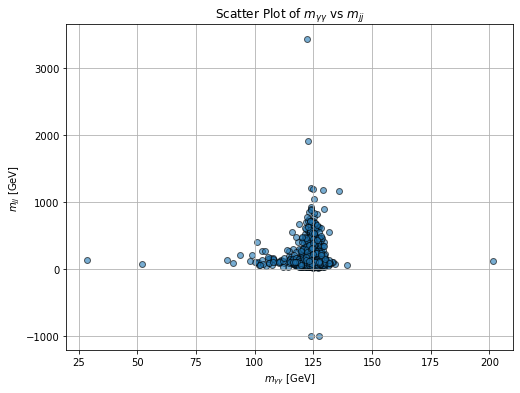

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(diphoton_mass, dijet_mass, alpha=0.6, edgecolor='k')
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel(r"$m_{jj}$ [GeV]")
plt.title("Scatter Plot of $m_{\gamma\gamma}$ vs $m_{jj}$")
plt.grid(True)
plt.show()


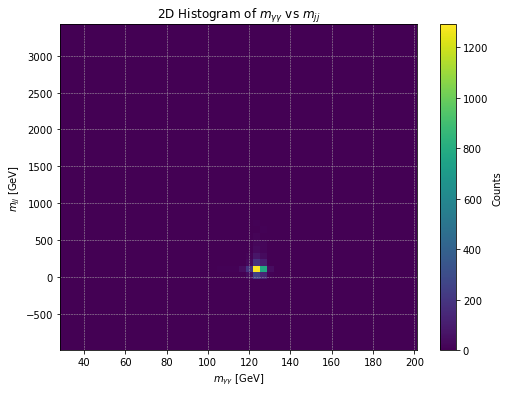

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist2d(diphoton_mass, dijet_mass, bins=(50, 50), cmap='viridis')
plt.colorbar(label='Counts')
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel(r"$m_{jj}$ [GeV]")
plt.title("2D Histogram of $m_{\gamma\gamma}$ vs $m_{jj}$")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


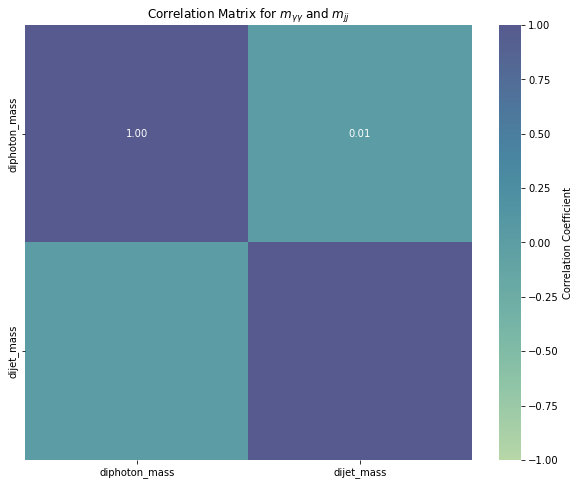

In [13]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for easier manipulation
data = pd.DataFrame({
    "diphoton_mass": diphoton_mass,
    "dijet_mass": dijet_mass,
})

# Compute the correlation matrix
corr_matrix = data.corr()

# # Plot the heatmap
# plt.figure(figsize=(6, 5))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", alpha = 0.8, cbar=True)
# plt.title("Correlation Matrix")
# plt.show()

# Create a green-blue colormap
green_blue_cmap = sns.color_palette("crest", as_cmap=True)  # Seaborn colormap

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap=green_blue_cmap,  # Use the green-blue colormap
    cbar_kws={"label": "Correlation Coefficient"},  # Add colorbar label
    vmin=-1, 
    vmax=1, 
    alpha = 0.8
)

plt.title("Correlation Matrix for $m_{\gamma\gamma}$ and $m_{jj}$")
# Save the plot
output_dir = "/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/"
plt.savefig(f"{output_dir}Correlation_plot_mgg_mjj.png")
plt.savefig(f"{output_dir}Correlation_plot_mgg_mjj.pdf")
plt.show()

In [22]:
ls /afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/

CrystalBall_Fit_Diphoton_mass.pdf  Gaussian_Fit_Diphoton_mass.pdf  index.php
CrystalBall_Fit_Diphoton_mass.png  Gaussian_Fit_Diphoton_mass.png


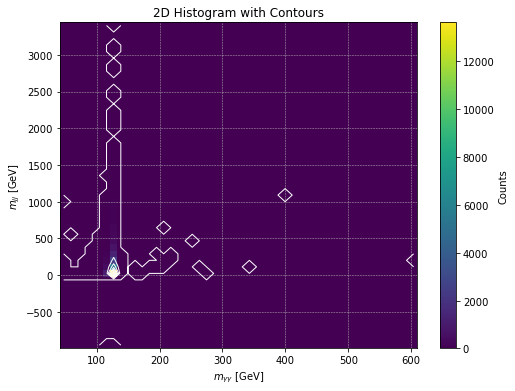

In [13]:
plt.figure(figsize=(8, 6))
counts, xedges, yedges, _ = plt.hist2d(diphoton_mass, dijet_mass, bins=(50, 50), cmap='viridis')
plt.colorbar(label='Counts')
plt.contour(
    (xedges[:-1] + xedges[1:]) / 2, 
    (yedges[:-1] + yedges[1:]) / 2, 
    counts.T, colors='white', linewidths=1
)
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel(r"$m_{jj}$ [GeV]")
plt.title("2D Histogram with Contours")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


# m_{jj}vs Reduced mass

In [14]:
# Ensure both diphoton_mass and dijet_mass are in the same format and remove invalid entries
valid_indices = ~(ak.is_none(dijet_mass) | ak.is_none(reduced_mass))
dijet_mass = ak.to_numpy(dijet_mass[valid_indices])
reduced_mass = ak.to_numpy(reduced_mass[valid_indices])

# Compute Pearson correlation coefficient
correlation = np.corrcoef(dijet_mass, reduced_mass)[0, 1]

print(f"Correlation coefficient between m_jj and reduced_mass: {correlation:.4f}")


Correlation coefficient between m_jj and reduced_mass: 0.4109


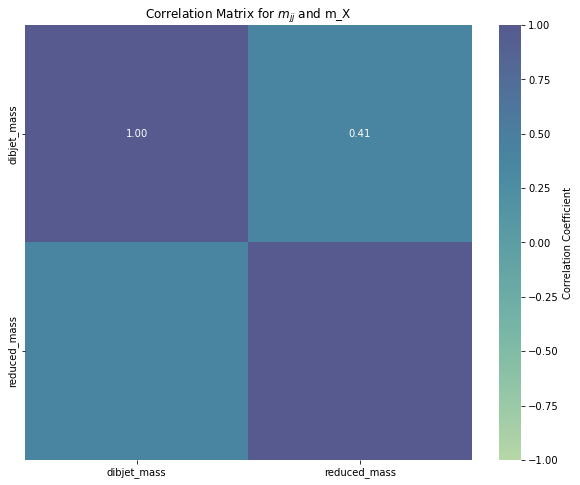

In [15]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for easier manipulation
data = pd.DataFrame({
    "dibjet_mass": dijet_mass,
    "reduced_mass": reduced_mass,
})

# Compute the correlation matrix
corr_matrix = data.corr()

# Create a green-blue colormap
green_blue_cmap = sns.color_palette("crest", as_cmap=True)  # Seaborn colormap

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap=green_blue_cmap,  # Use the green-blue colormap
    cbar_kws={"label": "Correlation Coefficient"},  # Add colorbar label
    vmin=-1, 
    vmax=1, 
    alpha = 0.8
)

plt.title("Correlation Matrix for $m_{jj}$ and m_X")
# Save the plot
output_dir = "/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/"
plt.savefig(f"{output_dir}Correlation_plot_mjj_reducedmass.png")
plt.savefig(f"{output_dir}Correlation_plot_mjj_reducedmass.pdf")
plt.show()

# m_gg vs reduced mass 

In [24]:
# Ensure both diphoton_mass and dijet_mass are in the same format and remove invalid entries
valid_indices = ~(ak.is_none(diphoton_mass) | ak.is_none(reduced_mass))
diphoton_mass = ak.to_numpy(diphoton_mass[valid_indices])
reduced_mass = ak.to_numpy(reduced_mass[valid_indices])

# Compute Pearson correlation coefficient
correlation = np.corrcoef(diphoton_mass, reduced_mass)[0, 1]

print(f"Correlation coefficient between m_γγ and reduced_mass: {correlation:.4f}")


Correlation coefficient between m_γγ and reduced_mass: 0.0261


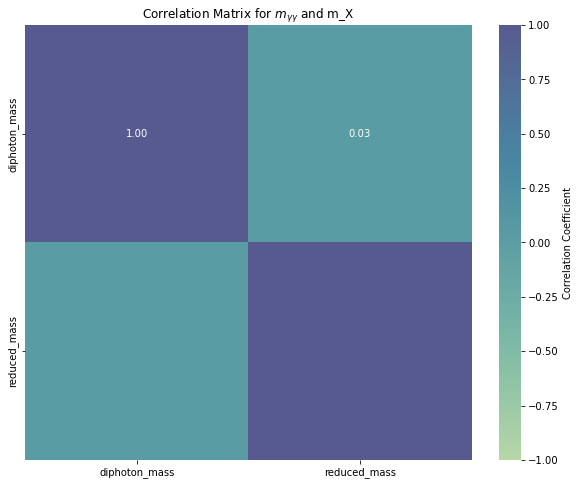

In [16]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for easier manipulation
data = pd.DataFrame({
    "diphoton_mass": diphoton_mass,
    "reduced_mass": reduced_mass,
})

# Compute the correlation matrix
corr_matrix = data.corr()

# Create a green-blue colormap
green_blue_cmap = sns.color_palette("crest", as_cmap=True)  # Seaborn colormap

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap=green_blue_cmap,  # Use the green-blue colormap
    cbar_kws={"label": "Correlation Coefficient"},  # Add colorbar label
    vmin=-1, 
    vmax=1, 
    alpha = 0.8
)

plt.title("Correlation Matrix for $m_{\gamma\gamma}$ and m_X")
# Save the plot
output_dir = "/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/"
plt.savefig(f"{output_dir}Correlation_plot_mgg_reducedmass.png")
plt.savefig(f"{output_dir}Correlation_plot_mgg_reducedmass.pdf")
plt.show()

# bbgg_mass vs m_gg

In [26]:
# Ensure both diphoton_mass and dijet_mass are in the same format and remove invalid entries
valid_indices = ~(ak.is_none(bbgg_mass) | ak.is_none(diphoton_mass))
bbgg_mass = ak.to_numpy(bbgg_mass[valid_indices])
diphoton_mass = ak.to_numpy(diphoton_mass[valid_indices])

# Compute Pearson correlation coefficient
correlation = np.corrcoef(bbgg_mass, diphoton_mass)[0, 1]

print(f"Correlation coefficient between m_bbgg and m_gg: {correlation:.4f}")


Correlation coefficient between m_bbgg and m_gg: 0.0353


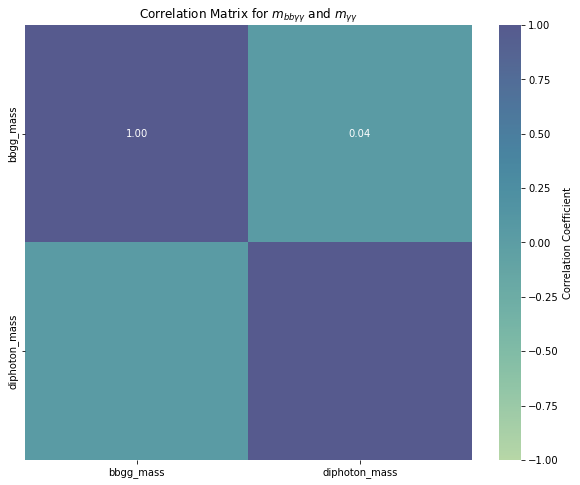

In [27]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for easier manipulation
data = pd.DataFrame({
    "bbgg_mass": bbgg_mass,
    "diphoton_mass": diphoton_mass,
})

# Compute the correlation matrix
corr_matrix = data.corr()

# Create a green-blue colormap
green_blue_cmap = sns.color_palette("crest", as_cmap=True)  # Seaborn colormap

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap=green_blue_cmap,  # Use the green-blue colormap
    cbar_kws={"label": "Correlation Coefficient"},  # Add colorbar label
    vmin=-1, 
    vmax=1, 
    alpha = 0.8
)

plt.title("Correlation Matrix for $m_{bb\gamma\gamma}$ and $m_{\gamma\gamma}$")
# Save the plot
output_dir = "/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/"
plt.savefig(f"{output_dir}Correlation_plot_mbbgg_mgg.png")
plt.savefig(f"{output_dir}Correlation_plot_mbbgg_mgg.pdf")
plt.show()

# bbgg_mass vs m_jj

In [28]:
# Ensure both diphoton_mass and dijet_mass are in the same format and remove invalid entries
valid_indices = ~(ak.is_none(bbgg_mass) | ak.is_none(dijet_mass))
bbgg_mass = ak.to_numpy(bbgg_mass[valid_indices])
dijet_mass = ak.to_numpy(dijet_mass[valid_indices])

# Compute Pearson correlation coefficient
correlation = np.corrcoef(bbgg_mass, dijet_mass)[0, 1]

print(f"Correlation coefficient between m_bbgg and m_jj: {correlation:.4f}")


Correlation coefficient between m_bbgg and m_jj: 0.8866


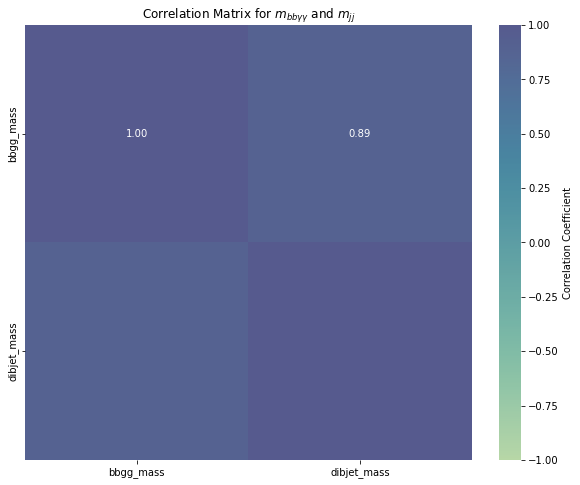

In [29]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for easier manipulation
data = pd.DataFrame({
    "bbgg_mass": bbgg_mass,
    "dibjet_mass": dijet_mass,
})

# Compute the correlation matrix
corr_matrix = data.corr()

# Create a green-blue colormap
green_blue_cmap = sns.color_palette("crest", as_cmap=True)  # Seaborn colormap

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap=green_blue_cmap,  # Use the green-blue colormap
    cbar_kws={"label": "Correlation Coefficient"},  # Add colorbar label
    vmin=-1, 
    vmax=1, 
    alpha = 0.8
)

plt.title("Correlation Matrix for $m_{bb\gamma\gamma}$ and $m_{jj}$")
# Save the plot
output_dir = "/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/"
plt.savefig(f"{output_dir}Correlation_plot_mbbgg_mjj.png")
plt.savefig(f"{output_dir}Correlation_plot_mbbgg_mjj.pdf")
plt.show()

# Background correlation

In [36]:
import uproot
import awkward as ak
from vector import Array as awk


# Path to the ROOT file and tree
file_path_background = "../../../output_root/v2_production/backgrounds/GGJets.root"
tree_name = "DiphotonTree/data_125_13TeV_NOTAG/"

# Load the ROOT file and extract variables
with uproot.open(file_path_background) as file:
    tree = file[tree_name]
    
    # Extract b-jet variables
    lead_bjet_pt = tree["Res_lead_bjet_pt"].array(library="ak")    # Transverse momentum of leading b-jet
    lead_bjet_eta = tree["Res_lead_bjet_eta"].array(library="ak")  # Pseudorapidity of leading b-jet
    lead_bjet_phi = tree["Res_lead_bjet_phi"].array(library="ak")  # Azimuthal angle of leading b-jet
    lead_bjet_mass = tree["Res_lead_bjet_mass"].array(library="ak") # Mass of leading b-jet

    sublead_bjet_pt = tree["Res_sublead_bjet_pt"].array(library="ak")    # Transverse momentum of subleading b-jet
    sublead_bjet_eta = tree["Res_sublead_bjet_eta"].array(library="ak")  # Pseudorapidity of subleading b-jet
    sublead_bjet_phi = tree["Res_sublead_bjet_phi"].array(library="ak")  # Azimuthal angle of subleading b-jet
    sublead_bjet_mass = tree["Res_sublead_bjet_mass"].array(library="ak") # Mass of subleading b-jet

    # Extract dijet variables
    dijet_pt = tree["Res_dijet_pt"].array(library="ak")    # Transverse momentum of the dijet system
    dijet_eta = tree["Res_dijet_eta"].array(library="ak")  # Pseudorapidity of the dijet system
    dijet_phi = tree["Res_dijet_phi"].array(library="ak")  # Azimuthal angle of the dijet system
    dijet_mass = tree["Res_dijet_mass"].array(library="ak") # Mass of the dijet system
    
    bbgg_mass = tree["Res_HHbbggCandidate_mass"].array(library="ak")

# Load the ROOT file and extract variables
with uproot.open(file_path_background) as file:
    tree = file[tree_name]
    lead_pho_pt = tree["lead_pt"].array(library="ak")
    lead_pho_eta = tree["lead_eta"].array(library="ak")
    lead_pho_phi = tree["lead_phi"].array(library="ak")
    sublead_pho_pt = tree["sublead_pt"].array(library="ak")
    sublead_pho_eta = tree["sublead_eta"].array(library="ak")
    sublead_pho_phi = tree["sublead_phi"].array(library="ak")

# Define the lVector function
def lVector(pt1, eta1, phi1, pt2, eta2, phi2, mass1=0, mass2=0):
    lvec_1 = awk(
        ak.zip({"pt": pt1, "eta": eta1, "phi": phi1, "mass": ak.full_like(pt1, mass1)})
    )
    lvec_2 = awk(
        ak.zip({"pt": pt2, "eta": eta2, "phi": phi2, "mass": ak.full_like(pt2, mass2)})
    )
    lvec_ = lvec_1 + lvec_2
    return lvec_

# Compute the diphoton Lorentz vector
diphoton_ = lVector(
    lead_pho_pt,
    lead_pho_eta,
    lead_pho_phi,
    sublead_pho_pt,
    sublead_pho_eta,
    sublead_pho_phi,
)

In [3]:
import numpy as np

# Compute diphoton mass from its Lorentz vector
diphoton_mass = diphoton_.mass

# Ensure both diphoton_mass and dijet_mass are in the same format and remove invalid entries
valid_indices = ~(ak.is_none(diphoton_mass) | ak.is_none(dijet_mass))
diphoton_mass = ak.to_numpy(diphoton_mass[valid_indices])
dijet_mass = ak.to_numpy(dijet_mass[valid_indices])

# Compute Pearson correlation coefficient
correlation = np.corrcoef(diphoton_mass, dijet_mass)[0, 1]

print(f"Correlation coefficient between m_γγ and m_jj: {correlation:.4f}")


Correlation coefficient between m_γγ and m_jj: 0.0166


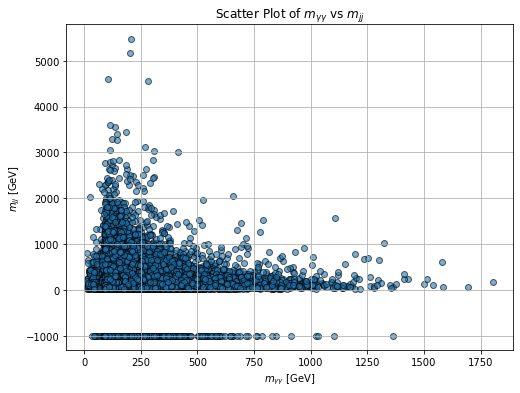

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(diphoton_mass, dijet_mass, alpha=0.6, edgecolor='k')
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel(r"$m_{jj}$ [GeV]")
plt.title("Scatter Plot of $m_{\gamma\gamma}$ vs $m_{jj}$")
plt.grid(True)
plt.show()


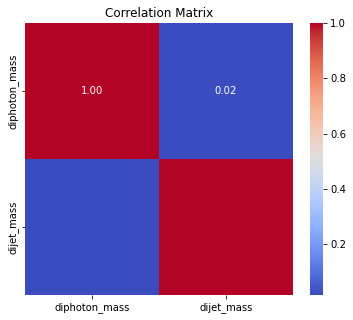

In [5]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for easier manipulation
data = pd.DataFrame({
    "diphoton_mass": diphoton_mass,
    "dijet_mass": dijet_mass,
})

# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()


# Variable potting 

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep

import os

def plot_variable(data, xlabel, log_scale=False, xlim=None, save_dir=None, filename="plot", cms_fontsize=16):
    """
    Plot a variable in CMS style using mplhep and save in multiple formats.

    Parameters:
    - data: NumPy array of values to plot
    - xlabel: Label for the x-axis
    - log_scale: Whether to use a logarithmic scale
    - xlim: Tuple specifying the x-axis limits (e.g., (xmin, xmax))
    - save_dir: Directory to save the plot (if None, the plot is not saved)
    - filename: Name of the file to save (without extension)
    - cms_fontsize: Font size for the CMS label text
    """
    # Create figure
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot histogram
    counts, bins, _ = ax.hist(data, bins=200, histtype='step', lw=2, color="blue", label="Signal")
    
    # Add CMS text
    hep.cms.label(
        "Preliminary",
        data=True,
        lumi=26.7,  # Integrated luminosity in fb^-1
        com=13.6,   # Center-of-mass energy in TeV
        loc=0,
        ax=ax,
        fontsize=cms_fontsize
    )
    
    # Set axis labels and style
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel("Events", fontsize=16)
    ax.tick_params(axis='both', labelsize=14)
    
    # Set x-axis limits if provided
    if xlim:
        ax.set_xlim(xlim)
    
    # Set log scale if required
    if log_scale:
        ax.set_yscale("log")
    
    # Add legend
    ax.legend(fontsize=14)
    
    # Save or show the plot
    plt.tight_layout()
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)  # Create directory if it doesn't exist
        plt.savefig(os.path.join(save_dir, f"{filename}.png"))
        plt.savefig(os.path.join(save_dir, f"{filename}.pdf"))
    plt.show()


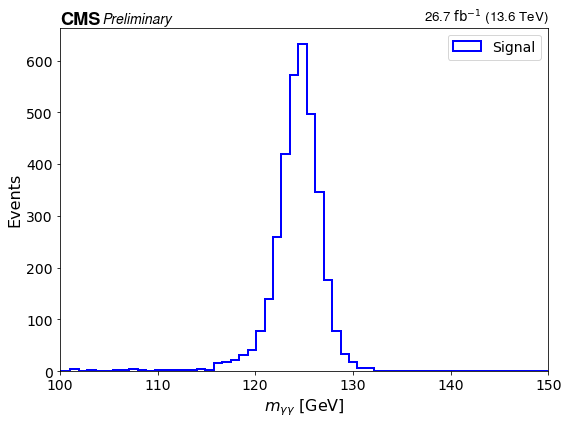

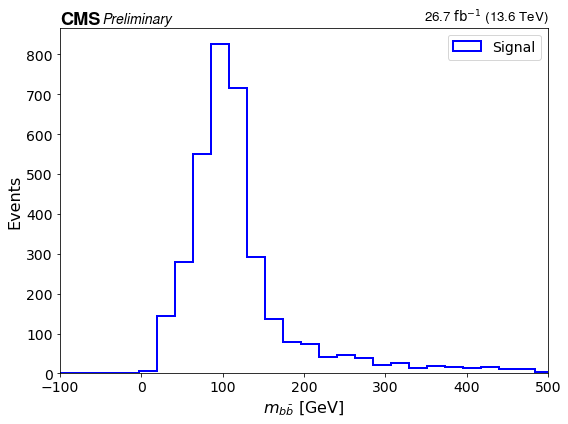

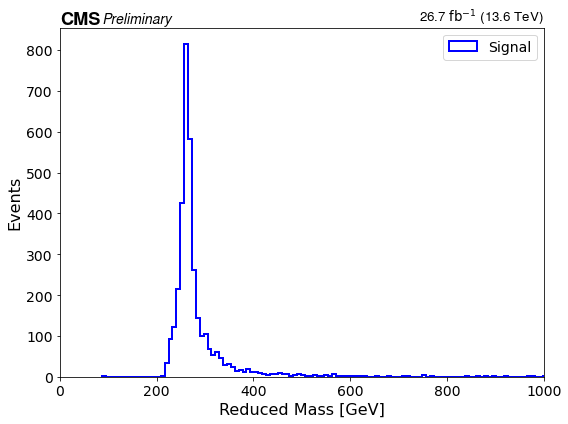

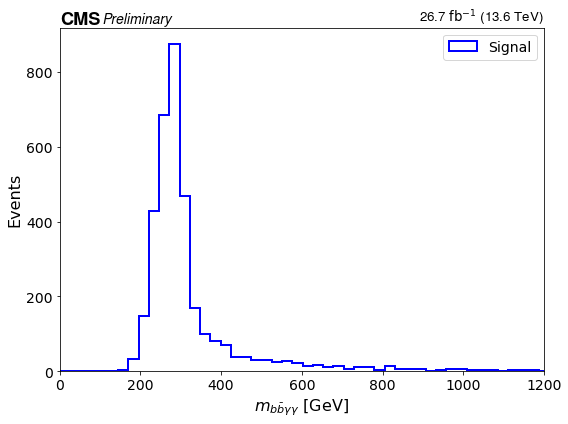

In [12]:

# Create the plots
plot_variable(
    diphoton_mass_np,
    xlabel=r"$m_{\gamma\gamma}$ [GeV]",
    xlim = (100,150),
    log_scale=False,
    save_dir="/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/",  # Folder to save the plots
    filename="diphoton_mass_signal",  # Base filename for saving
    cms_fontsize=14  # Adjust CMS text size
)
plot_variable(
    dijet_mass,
    xlabel=r"$m_{b\bar{b}}$ [GeV]",
    xlim = (-100,500),
    log_scale=False,
    save_dir="/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/",  # Folder to save the plots
    filename="dijet_mass_signal",  # Base filename for saving
    cms_fontsize=14  # Adjust CMS text size
)
plot_variable(
    reduced_mass,
    xlabel=r"Reduced Mass [GeV]",
    xlim = (0,1000),
    log_scale=False,
    save_dir="/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/",  # Folder to save the plots
    filename="reduced_mass_signal",  # Base filename for saving
    cms_fontsize=14  # Adjust CMS text size
)
plot_variable(
    bbgg_mass_np,
    xlabel=r"$m_{b\bar{b}\gamma\gamma}$ [GeV]",
    xlim = (0,1200),
    log_scale=False,
    save_dir="/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/",  # Folder to save the plots
    filename="bbgg_mass_signal",  # Base filename for saving
    cms_fontsize=14  # Adjust CMS text size
)


In [ ]:
# Correaltion with ROOT

In [7]:
import uproot
import awkward as ak
from vector import Array as awk
import numpy as np

# Load the ROOT file and tree
file_path_signal = "../../../output_root/v2_production/signal_NMSSM/NMSSM_X400_Y90.root"
tree_name = "DiphotonTree/data_125_13TeV_NOTAG/"

with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    
    # Extract variables
    dijet_mass = tree["Res_dijet_mass"].array(library="ak")
    bbgg_mass = tree["Res_HHbbggCandidate_mass"].array(library="ak")
    lead_pho_pt = tree["lead_pt"].array(library="ak")
    lead_pho_eta = tree["lead_eta"].array(library="ak")
    lead_pho_phi = tree["lead_phi"].array(library="ak")
    sublead_pho_pt = tree["sublead_pt"].array(library="ak")
    sublead_pho_eta = tree["sublead_eta"].array(library="ak")
    sublead_pho_phi = tree["sublead_phi"].array(library="ak")

# Define the lVector function
def lVector(pt1, eta1, phi1, pt2, eta2, phi2, mass1=0, mass2=0):
    lvec_1 = awk(
        ak.zip({"pt": pt1, "eta": eta1, "phi": phi1, "mass": ak.full_like(pt1, mass1)})
    )
    lvec_2 = awk(
        ak.zip({"pt": pt2, "eta": eta2, "phi": phi2, "mass": ak.full_like(pt2, mass2)})
    )
    return lvec_1 + lvec_2

# Compute the diphoton Lorentz vector and mass
diphoton_ = lVector(
    lead_pho_pt, lead_pho_eta, lead_pho_phi, 
    sublead_pho_pt, sublead_pho_eta, sublead_pho_phi
)
diphoton_mass = diphoton_.mass

# Convert variables to NumPy arrays
dijet_mass_np = ak.to_numpy(dijet_mass)
diphoton_mass_np = ak.to_numpy(diphoton_mass)

# Remove invalid entries (NaN or None)
valid_mask = ~(np.isnan(dijet_mass_np) | np.isnan(diphoton_mass_np))
dijet_mass_np = dijet_mass_np[valid_mask]
diphoton_mass_np = diphoton_mass_np[valid_mask]

# Compute correlation coefficient
correlation = np.corrcoef(diphoton_mass_np, dijet_mass_np)[0, 1]
print(f"Correlation coefficient between m_γγ and m_jj: {correlation:.4f}")


Correlation coefficient between m_γγ and m_jj: -0.0004


## Selection

**we don't have selection on the signal. rerun the `hhbbgg_Analyzer` and get the output and then run this part**

In [11]:
import os
import pandas as pd
import uproot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
signal = [
    ("../../outputfiles/hhbbgg_analyzer-v2-trees.root", "/NMSSM_X400_Y125/preselection")
]

In [5]:
keys  = ['diphoton_mass', 'dibjet_mass', 'bbgg_mass']

In [6]:
# Load DataFrames
dfs = {}

# Load lowX files
for file, key in signal:
    try:
        with uproot.open(file) as f:
            dfs[key] = f[key].arrays(keys, library="pd")
    except Exception as e:
        print(f"Error loading {file} with key {key}: {e}")


In [7]:
# Extracting the specific dataframe
NMSSM_X400_Y125_preselection = dfs["/NMSSM_X400_Y125/preselection"]

# Define each variable separately
diphoton_mass = NMSSM_X400_Y125_preselection["diphoton_mass"]
dibjet_mass = NMSSM_X400_Y125_preselection["dibjet_mass"]

In [8]:
dibjet_mass

0      179.236349
1      132.693276
2       97.221478
3       56.743264
4       76.919786
          ...    
519     47.694245
520    102.170998
521     87.386670
522    138.755250
523     77.133277
Name: dibjet_mass, Length: 524, dtype: float64

In [9]:
# Ensure the variables are in the correct format and remove NaNs
diphoton_mass = NMSSM_X400_Y125_preselection["diphoton_mass"].dropna()
dibjet_mass = NMSSM_X400_Y125_preselection["dibjet_mass"].dropna()
bbgg_mass = NMSSM_X400_Y125_preselection["bbgg_mass"].dropna()
reduced_mass = bbgg_mass - (diphoton_mass - 125) - (dibjet_mass - 125)

Correlation coefficient between m_γγ and m_jj: 0.0912


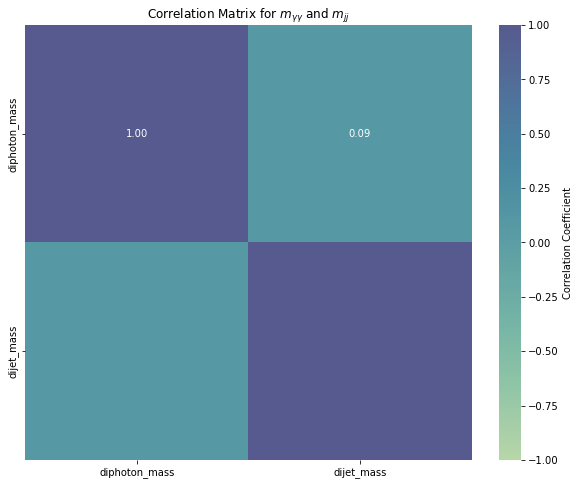

In [12]:
# Ensure both variables have the same length
min_length = min(len(diphoton_mass), len(dibjet_mass))
diphoton_mass = diphoton_mass[:min_length]
dibjet_mass = dibjet_mass[:min_length]

# Compute Pearson correlation coefficient
correlation = np.corrcoef(diphoton_mass, dibjet_mass)[0, 1]
print(f"Correlation coefficient between m_γγ and m_jj: {correlation:.4f}")

# Create a DataFrame for easier manipulation
data = pd.DataFrame({
    "diphoton_mass": diphoton_mass,
    "dijet_mass": dibjet_mass,
})

# Compute the correlation matrix
corr_matrix = data.corr()

# Define a green-blue colormap
green_blue_cmap = sns.color_palette("crest", as_cmap=True)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap=green_blue_cmap,  
    cbar_kws={"label": "Correlation Coefficient"},  
    vmin=-1, 
    vmax=1, 
    alpha=0.8
)

plt.title(r"Correlation Matrix for $m_{\gamma\gamma}$ and $m_{jj}$")

# Save the plot
# output_dir = "/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/"
# plt.savefig(f"{output_dir}Correlation_background_plot_mgg_mjj.png")
# plt.savefig(f"{output_dir}Correlation_background_plot_mgg_mjj.pdf")

plt.show()

Correlation coefficient between m_bbγγ and m_jj: 0.3597


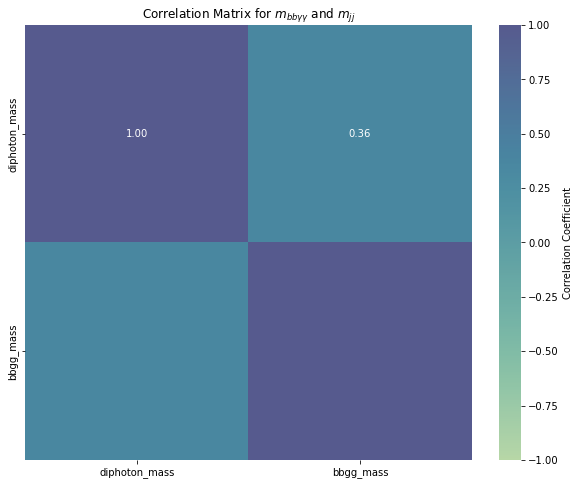

In [16]:
# Ensure both variables have the same length
min_length = min(len(diphoton_mass), len(bbgg_mass))
diphoton_mass = diphoton_mass[:min_length]
dibjet_mass = bbgg_mass[:min_length]

# Compute Pearson correlation coefficient
correlation = np.corrcoef(diphoton_mass, bbgg_mass)[0, 1]
print(f"Correlation coefficient between m_bbγγ and m_jj: {correlation:.4f}")

# Create a DataFrame for easier manipulation
data = pd.DataFrame({
    "diphoton_mass": diphoton_mass,
    "bbgg_mass": bbgg_mass,
})

# Compute the correlation matrix
corr_matrix = data.corr()

# Define a green-blue colormap
green_blue_cmap = sns.color_palette("crest", as_cmap=True)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap=green_blue_cmap,  
    cbar_kws={"label": "Correlation Coefficient"},  
    vmin=-1, 
    vmax=1, 
    alpha=0.8
)

plt.title(r"Correlation Matrix for $m_{bb\gamma\gamma}$ and $m_{jj}$")

# Save the plot
# output_dir = "/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/"
# plt.savefig(f"{output_dir}Correlation_background_plot_mgg_mjj.png")
# plt.savefig(f"{output_dir}Correlation_background_plot_mgg_mjj.pdf")

plt.show()

Correlation coefficient between m_γγ and m_jj: 1.0000


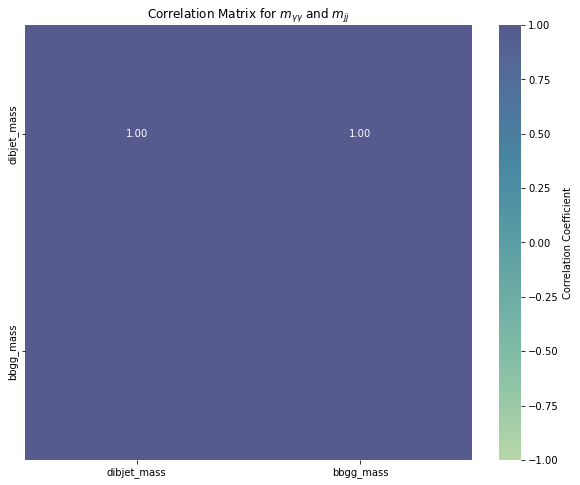

In [17]:
# Ensure both variables have the same length
min_length = min(len(dibjet_mass), len(bbgg_mass))
dibjet_mass = dibjet_mass[:min_length]
bbgg_mass = bbgg_mass[:min_length]

# Compute Pearson correlation coefficient
correlation = np.corrcoef(dibjet_mass, bbgg_mass)[0, 1]
print(f"Correlation coefficient between m_γγ and m_jj: {correlation:.4f}")

# Create a DataFrame for easier manipulation
data = pd.DataFrame({
    "dibjet_mass": dibjet_mass,
    "bbgg_mass": bbgg_mass,
})

# Compute the correlation matrix
corr_matrix = data.corr()

# Define a green-blue colormap
green_blue_cmap = sns.color_palette("crest", as_cmap=True)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap=green_blue_cmap,  
    cbar_kws={"label": "Correlation Coefficient"},  
    vmin=-1, 
    vmax=1, 
    alpha=0.8
)

plt.title(r"Correlation Matrix for $m_{\gamma\gamma}$ and $m_{jj}$")

# Save the plot
# output_dir = "/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/"
# plt.savefig(f"{output_dir}Correlation_background_plot_mgg_mjj.png")
# plt.savefig(f"{output_dir}Correlation_background_plot_mgg_mjj.pdf")

plt.show()